<a href="https://colab.research.google.com/github/rajkumarshahu/4-devguys-project/blob/master/4AI3_RajShahu_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Assignment #4 <br>SFWRTECH 4AI3:Artificial Intelligence**
**<center>|| <br> ||<br> ||**
**<center>Submitted by: Raj Kumar Shahu (ID: 400426052) <br> Date: November 7, 2023<br>**



In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma import mean
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Data Preprocessing and Visualization


In [13]:
df = pd.read_csv('/content/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


1. <b>First Part</b> - Add a part to the program so that age, gender and ticket class (Pclass) are considered as the input variables (features) for classifying survivors.

In [14]:
# Selecting 'Age', 'Sex', and 'Pclass' as features, and 'Survived' as the label.
features = ['Age', 'Sex', 'Pclass']
X = df[features][:240]  # First 240 entries for training and validation
y = df['Survived'][:240]
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


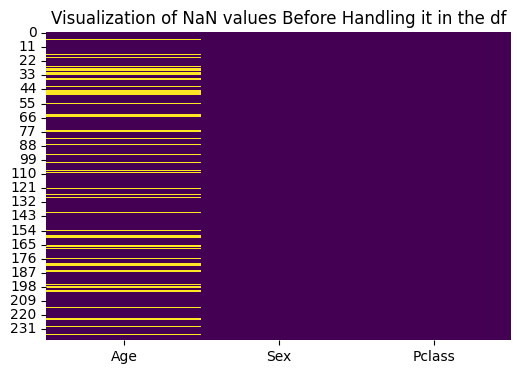

In [15]:
# Function to visualize NaN values using a heatmap
def visualize_nans(data, message):
    plt.figure(figsize=(6, 4))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Visualization of NaN values {message} Handling it in the df')
    plt.show()
title_message = "Before"
visualize_nans(X, title_message)

##### Handling Missing Values

In [16]:
X['Age'].fillna(X['Age'].mean(), inplace=True)

X.isnull().sum()

Age       0
Sex       0
Pclass    0
dtype: int64

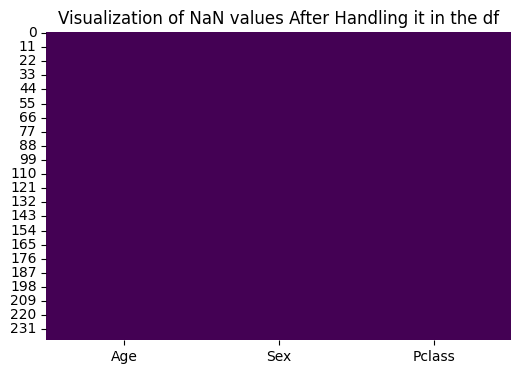

In [17]:
title_message = "After"
visualize_nans(X, title_message)

In [18]:
# Convert 'Sex' into numerical values (0 for 'female', 1 for 'male')
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Split the data into training and validation sets
X_train, X_val = X[:200], X[200:240]
y_train, y_val = y[:200], y[200:240]

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#### <b>Logistic Regression Model

1. <b>Second Part</B> - Construct the logistic regression model and estimate the parameters of the log odd function using the first 200 data points. Print the parameters of the model.

In [19]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Print the parameters of the logistic regression model
print("Logistic Regression Model Parameters:")
print("Intercept:", logistic_model.intercept_)
print("Coefficients:",logistic_model.coef_)

Logistic Regression Model Parameters:
Intercept: [-0.88738212]
Coefficients: [[-0.42256763 -1.31797939 -0.55972389]]


#### <b>Log Loss Calculation for Logistic Regression

2. Calculate the value of the log-loss function in this case for the sample points 201 to 240 (average of the penalty for these 40 samples) for this model.

In [20]:
logistic_pred_prob = logistic_model.predict_proba(X_val_scaled)
log_loss_logistic = log_loss(y_val, logistic_pred_prob)
print("Log-Loss for Logistic Regression:", log_loss_logistic)

Log-Loss for Logistic Regression: 0.4848945852200296


#### <b>MLP Neural Network Model

3. Add one more part to the program so that the same classification is done using an MLP neural networks. Assume two hidden layers in the MLP. In each layer, the number of the neurons are 2+n, where n is the right two most digits in your MacID card. This means, for instance if your MacID card is, say, 412345648, then the first hidden layer has 4+2=6 and the second hidden layer has 8+2=10 neurons. Check both relu and sigmoid activation functions and use the one with the best accuracy (less loss) for your final network.

In [21]:
'''
The architecture of the MLP neural network is determined by the last two digits of my ID "400426052", which are "52":
- First hidden layer: 5 + 2 = 7 neurons
- Second hidden layer: 2 + 2 = 4 neurons
'''
neurons_layer_1 = 7
neurons_layer_2 = 4

# MLP Classifier
# Trying both 'relu' and 'sigmoid' activations
mlp_relu = MLPClassifier(hidden_layer_sizes=(neurons_layer_1, neurons_layer_2), activation='relu', max_iter=1000, random_state=42)
mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(neurons_layer_1, neurons_layer_2), activation='logistic', max_iter=1000, random_state=42)

# Training both models
mlp_relu.fit(X_train_scaled, y_train)
mlp_sigmoid.fit(X_train_scaled, y_train)

# Predict probabilities for validation set
mlp_pred_prob_relu = mlp_relu.predict_proba(X_val_scaled)
mlp_pred_prob_sigmoid = mlp_sigmoid.predict_proba(X_val_scaled)

# Compute log-loss for both
log_loss_relu = log_loss(y_val, mlp_pred_prob_relu)
log_loss_sigmoid = log_loss(y_val, mlp_pred_prob_sigmoid)

# Selecting the best MLP model
# Comparison to find the better model based on log-loss
best_mlp = mlp_relu if log_loss_relu < log_loss_sigmoid else mlp_sigmoid
best_mlp_activation = 'relu' if log_loss_relu < log_loss_sigmoid else 'sigmoid'
best_log_loss = min(log_loss_relu, log_loss_sigmoid)

# Print out the results
print(f"Best MLP Model uses {best_mlp_activation} activation")


Best MLP Model uses relu activation


#### <b>Log Loss Calculation for NN Model

4. Calculate and print the value of the loss function for the NN model.

In [22]:
print("Log-Loss for the best MLP Model:", best_log_loss)

Log-Loss for the best MLP Model: 0.56559488803289
